# Data Glow Up #30 - Análise de Churn Dados de E-commerce


Base de dados traz 5 meses consecutivos, foi escolhida a análise de Churn para avalidar a retenção desses clientes para o desafio proposto. 

**O que é a taxa de Churn?**

Churn é um termo utilizado para descrever a taxa de perda de clientes ou usuários de um serviço ou produto ao longo de um determinado período de tempo. O churn pode ser expresso como uma porcentagem do total de clientes perdidos em relação ao número inicial de clientes ativos. Reduzir o churn é uma prioridade para muitas empresas, pois a retenção de clientes é geralmente mais rentável do que a aquisição de novos clientes.

A média de tempo ideal para analisar o churn de um ecommerce de cosméticos pode variar dependendo de diversos fatores, incluindo o ciclo de compra típico dos clientes, a frequência de compra dos produtos, e a sazonalidade do mercado de cosméticos. No entanto, muitas empresas costumam analisar o churn em intervalos mensais, trimestrais ou semestrais para obter insights relevantes sobre a retenção de clientes.

**Período de referência da análise**

Para um ecommerce de cosméticos, um período mensal pode ser uma escolha acertiva pois muitos clientes podem fazer compras regularmente ou experimentar produtos novos em intervalos mensais. Isso permite uma análise mais granular e a identificação de padrões de comportamento dos clientes ao longo do tempo.

In [1]:
#importanto as bibliotecas
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Carregando o arquivo CSV em um DataFrame do Pandas

df_oct2k19 = pd.read_csv('2019-Oct.csv')
df_nov2k19 = pd.read_csv('2019-Nov.csv')
df_dec2k19 = pd.read_csv('2019-Dec.csv')
df_jan2k20 = pd.read_csv('2020-Jan.csv')
df_feb2k20 = pd.read_csv('2020-Feb.csv')

In [3]:
# Demostrando as infos do primeiro df para comparar as colunas

df_oct2k19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4102283 entries, 0 to 4102282
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 281.7+ MB


In [4]:
# Demonstrando as infos do segundo df para comparar as colunas

df_nov2k19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4635837 entries, 0 to 4635836
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 318.3+ MB


In [5]:
# Demonstrando as infos do terceiro df para comparar as colunas

df_dec2k19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3533286 entries, 0 to 3533285
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 242.6+ MB


In [6]:
# Demonstrando as infos do quarto df para comparar as colunas

df_jan2k20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4264752 entries, 0 to 4264751
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 292.8+ MB


In [7]:
# Demonstrandoas infos do quinto df para comparar as colunas

df_feb2k20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4156682 entries, 0 to 4156681
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 285.4+ MB


**União de linhas**

Após verificar que as tabelas possuem as mesmas colunas, com os mesmos títulos e tipo de dado, podemos fazer a união de tabelas no formato de sobreposição de linhas. Isso, para que possamos analisar os dados como uma tabela somente. Como temos a coluna de [event_time], é possível observar o comportamento do [user_id] ao longo do tempo, entendendo se ele parou de comprar ou não.

In [8]:
# Lista de todos os DataFrames
dfs = [df_oct2k19, df_nov2k19, df_dec2k19, df_jan2k20, df_feb2k20]

In [9]:
# Concatenar todos os DataFrames em um só
df_unificado = pd.concat(dfs, ignore_index=True)

df_unificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20692840 entries, 0 to 20692839
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.4+ GB


In [10]:
#Convertendo a coluna ['event_time'] para formato datetime

df_unificado['event_time'] = pd.to_datetime(df_unificado['event_time'], errors='coerce', utc=True)

In [11]:
# Trazendo as primeiras 5 linhas do df_unificado 

df_unificado.head(5)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00+00:00,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03+00:00,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07+00:00,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07+00:00,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15+00:00,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9


In [12]:
# Trazendo as últimas 5 linhas do df_unificado 

df_unificado.tail(5)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
20692835,2020-02-29 23:59:32+00:00,view,5885416,1487580005092295511,NaN,grattol,6.27,622082947,fb29909b-6ef5-4662-b4ee-288e73e5dc10
20692836,2020-02-29 23:59:39+00:00,cart,5550686,1487580008145748965,NaN,NaN,1.11,459705611,05d2add3-01f7-47ee-8364-27341673227f
20692837,2020-02-29 23:59:45+00:00,view,5850628,1602943681873052386,NaN,grattol,5.24,622090043,ab7d349f-db5d-4790-8ab1-31e5c894459d
20692838,2020-02-29 23:59:54+00:00,view,5716351,1487580010872045658,NaN,irisk,0.79,619841242,18af673b-7fb9-4202-a66d-5c855bc0fd2d
20692839,2020-02-29 23:59:59+00:00,view,5927709,1487580013950664926,NaN,de.lux,3.17,621669991,daa3c677-5360-4327-847e-d29658716b99


**Critério para a análise ser e elegível a análise do churn**

Para que possamos compreender o comportamento do usuário, é necessário ter uma recorrência de compra. Então precisamos analisar se o [user_id] se repete em mais de uma transação, isso significa que ele está retornando para a compra. Primeiro, precisamos analisar quantos usuários estamos analisando, para depois entender a sua frequência.

In [13]:
# Contagem distinta de usuários 

contagem_distinta = df_unificado['user_id'].nunique()
print(contagem_distinta)

1639358


In [14]:
#Contagem de frequência que o user_id aparece, agrupado por user_id

contagem_users = df_unificado['user_id'].value_counts()
print("Contagem usuários:\n",contagem_users)

Contagem usuários:
 user_id
527021202    26752
557616099     9903
583884978     9420
419558969     8283
476450673     8122
             ...  
572081766        1
596133477        1
572081604        1
572080990        1
577541482        1
Name: count, Length: 1639358, dtype: int64


**Algumas análises utilizando o Matplotlib**

Agora vamos realizar algumas análises utlização a bilbioteca MatPlotlib para poder identificar alguns comportamentos, como a quantidade de clientes ativos por mês, quantidade de clientes por [brand] e por [event_type]

C:\Users\Computador\AppData\Local\Temp\ipykernel_14824\1370763869.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_unificado['month'] = df_unificado['event_time'].dt.to_period('M')


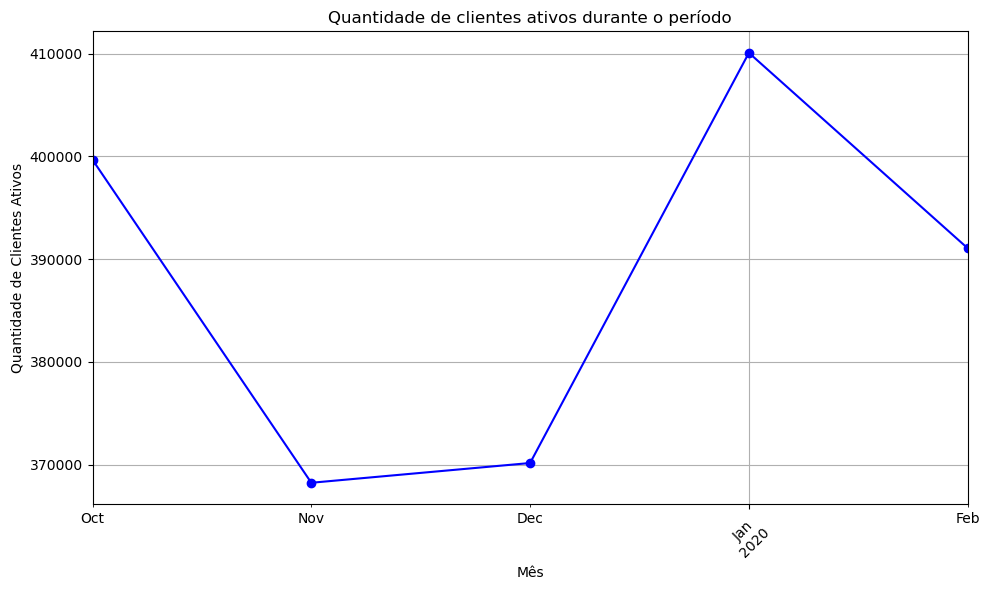

In [15]:
#criando a análise de quantidade de clientes ativos por mês

# Extrair o mês do 'event_time'
df_unificado['month'] = df_unificado['event_time'].dt.to_period('M')

# Contar o número de usuários únicos por mês
monthly_users = df_unificado.groupby('month')['user_id'].nunique()

# Criar o gráfico
plt.figure(figsize=(10, 6))
monthly_users.plot(kind='line', marker='o', color='b')

# Configurar título e rótulos dos eixos
plt.title('Quantidade de clientes ativos durante o período')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Clientes Ativos')

# Mostrar o gráfico
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Analisando os Tipos de Evento**

A coluna [event_type] trás os eventos ocorridos na loja. Por eventos, ele considera as interações dos usuários com a loja. A melhor forma de visualização é entendendo as ações como um funil, pois o mesmo usuário que visualizou uma compra, pode ter realizado o pagamento. Entretanto,escolhi utilizar o gráfico de barras horizontal, o que se assemelha a uma visão de funil.

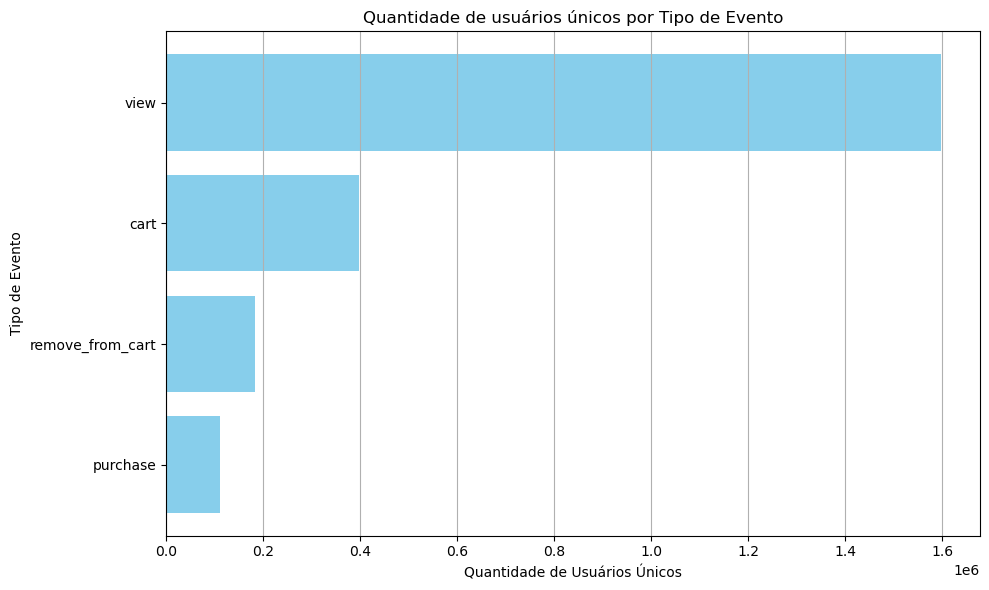

In [16]:
#criando a análise de clientes ativos por event_type(Tipos de evento)

# Contar o número de usuários únicos por tipo de evento
unique_users_by_event_type = df_unificado.groupby('event_type')['user_id'].nunique()

# Ordenar os valores em ordem decrescente
unique_users_by_event_type_sorted = unique_users_by_event_type.sort_values(ascending=True)

# Criar o gráfico de barras horizontal
plt.figure(figsize=(10, 6))
plt.barh(unique_users_by_event_type_sorted.index, unique_users_by_event_type_sorted.values, color='skyblue')

# Configurar título e rótulos dos eixos
plt.title('Quantidade de usuários únicos por Tipo de Evento')
plt.xlabel('Quantidade de Usuários Únicos')
plt.ylabel('Tipo de Evento')

# Mostrar o gráfico
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

**Entendendo o campo remove_from_cart**

remove_from_cart é uma ação que geralmente ocorre em sistemas de comércio eletrônico, onde um usuário remove um item específico do seu carrinho de compras antes de concluir a compra. 

Por exemplo, se um cliente adicionou um produto ao carrinho de compras, mas depois decidiu não comprá-lo e removeu-o do carrinho, isso seria registrado como um evento de "remove from cart". Esse tipo de evento é útil para entender o comportamento dos usuários e pode ser usado para otimizar a experiência de compra online.

Podemos considerar o status de remove_from_cart como uma ação pontual de churn, ou seja, o cliente desistiu da compra. Aplicando a regra se ele voltou a comprar naquele mesmo mês, podemos considerar que o churn não ocorreu.


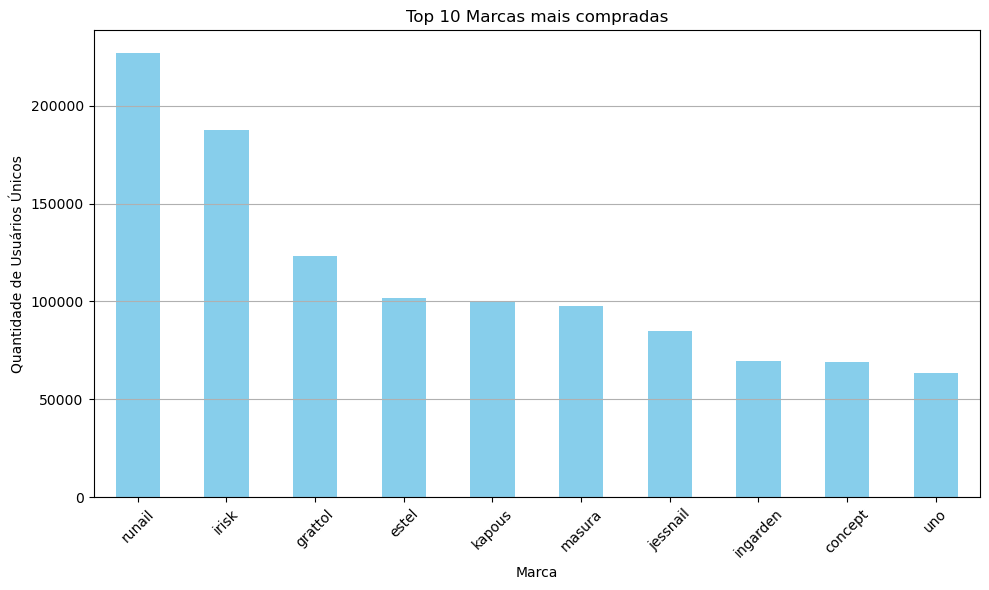

In [17]:
#criando a análise de clientes ativos por brand(Top 10 mais requisitadas na loja)

# Fazer um groupby pela marca e contar o número de usuários únicos
unique_users_by_brand = df_unificado.groupby('brand')['user_id'].nunique()

# Ordenar os valores em ordem decrescente e pegar as 10 primeiras marcas
top_10_brands = unique_users_by_brand.sort_values(ascending=False).head(10)

# Criar o gráfico de barras vertical
plt.figure(figsize=(10, 6))
top_10_brands.plot(kind='bar', color='skyblue')

# Configurar título e rótulos dos eixos
plt.title('Top 10 Marcas mais compradas')
plt.xlabel('Marca')
plt.ylabel('Quantidade de Usuários Únicos')

# Mostrar o gráfico
plt.grid(True, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Exportação para o Power BI para criação da visualização de dados**

Agora vamos exportar os dados para poder visualizar em uma única label todas as informações acima. Ao exportar para o Power BI, podemos ver a interação entre as análises acima, e entender a correlação dos dados

In [18]:
#Salvar o df concatenado para um arquivo CSV 
df_unificado.to_csv('df_unificado.csv', index=False)